In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

sns.set_theme(style="whitegrid")
print("Pustaka berhasil diimpor!\n")

Pustaka berhasil diimpor!



In [7]:
train_df = pd.read_csv("preprocessing/train.csv")
test_df = pd.read_csv("preprocessing/test.csv")

print("Data Latih (Train) - 5 baris pertama:")
print(train_df.head(), "\n")

print("Data Uji (Test) - 5 baris pertama:")
print(test_df.head(), "\n")


Data Latih (Train) - 5 baris pertama:
  PassengerId HomePlanet  CryoSleep   Cabin    Destination  Age    VIP  \
0     0001_01      Earth      False   B/0/P    TRAPPIST-1e   39  False   
1     0002_01       Mars       True  F/33/S    55 Cancri e   24  False   
2     0003_01     Europa      False  A/23/S  PSO J318.5-22   58   True   
3     0004_01      Earth      False  G/12/P    TRAPPIST-1e   20  False   
4     0005_01       Mars       True  D/45/S    55 Cancri e   45  False   

   RoomService  FoodCourt  ShoppingMall  Spa  VRDeck           Name  \
0            0          0             0    0       0       John Doe   
1          109          9            25  549      44  Alice Johnson   
2           43        357             0    0       0  Michael Brown   
3            0          0             5    0       0   Sarah Connor   
4           89          0            10   30       5     Tony Stark   

   Transported  
0         True  
1        False  
2         True  
3        False  
4    

Informasi Data Latih:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   5 non-null      object
 1   HomePlanet    5 non-null      object
 2   CryoSleep     5 non-null      bool  
 3   Cabin         5 non-null      object
 4   Destination   5 non-null      object
 5   Age           5 non-null      int64 
 6   VIP           5 non-null      bool  
 7   RoomService   5 non-null      int64 
 8   FoodCourt     5 non-null      int64 
 9   ShoppingMall  5 non-null      int64 
 10  Spa           5 non-null      int64 
 11  VRDeck        5 non-null      int64 
 12  Name          5 non-null      object
 13  Transported   5 non-null      bool  
dtypes: bool(3), int64(6), object(5)
memory usage: 587.0+ bytes


None


Jumlah nilai hilang di setiap kolom:


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

Jumlah duplikat: 0


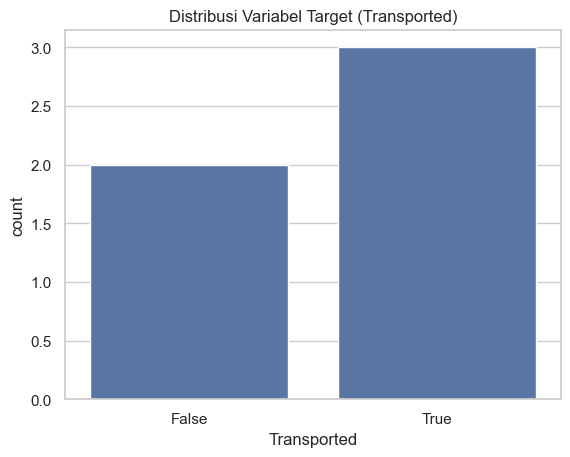

In [9]:
train_df = pd.read_csv("preprocessing/train.csv")
test_df = pd.read_csv("preprocessing/test.csv")

print("Informasi Data Latih:")
display(train_df.info())
print("\nJumlah nilai hilang di setiap kolom:")
display(train_df.isnull().sum())
print(f"Jumlah duplikat: {train_df.duplicated().sum()}")

sns.countplot(x='Transported', data=train_df)
plt.title('Distribusi Variabel Target (Transported)')
plt.show()

In [10]:
df = train_df.copy()

# Feature Engineering
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['Total_Spending'] = df[spending_cols].sum(axis=1)
df['Family_Name'] = df['Name'].apply(lambda x: str(x).split()[-1] if pd.notna(x) else 'Unknown')

print("Contoh hasil rekayasa fitur:")
print(df[['Cabin', 'Deck', 'Num', 'Side', 'Total_Spending', 'Name', 'Family_Name']].head(), "\n")

# Data Cleaning
for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_Spending']:
    df[col].fillna(df[col].median(), inplace=True)

for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Cek nilai hilang setelah imputasi:\n", df.isnull().sum(), "\n")

# Data Transformation - Scaling
scaler = StandardScaler()
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_Spending']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Encoding
for col in ['CryoSleep', 'VIP', 'Transported']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)

print("Data setelah encoding dan scaling:")
print(df.head(), "\n")

Contoh hasil rekayasa fitur:
    Cabin Deck Num Side  Total_Spending           Name Family_Name
0   B/0/P    B   0    P               0       John Doe         Doe
1  F/33/S    F  33    S             736  Alice Johnson     Johnson
2  A/23/S    A  23    S             400  Michael Brown       Brown
3  G/12/P    G  12    P               5   Sarah Connor      Connor
4  D/45/S    D  45    S             134     Tony Stark       Stark 

Cek nilai hilang setelah imputasi:
 PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Deck              0
Num               0
Side              0
Total_Spending    0
Family_Name       0
dtype: int64 

Data setelah encoding dan scaling:
  PassengerId  CryoSleep   Cabin       Age  VIP  RoomService  FoodCourt  \
0     0001_01          0  

C:\Users\asus\AppData\Local\Temp\ipykernel_25732\970677561.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_25732\970677561.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

C:\Users\asus\AppData\Local\Temp\ipykernel_25732\1672270468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_viz['Age'].fillna(df_viz['Age'].median(), inplace=True)


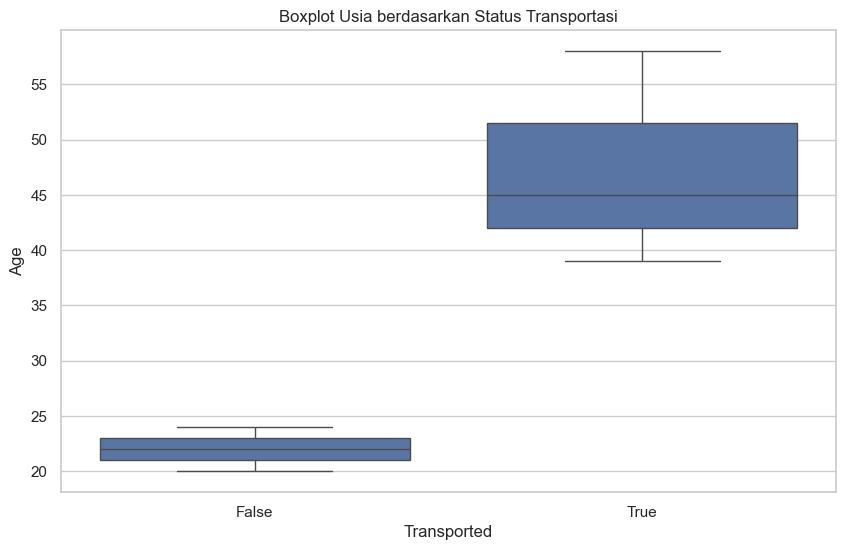

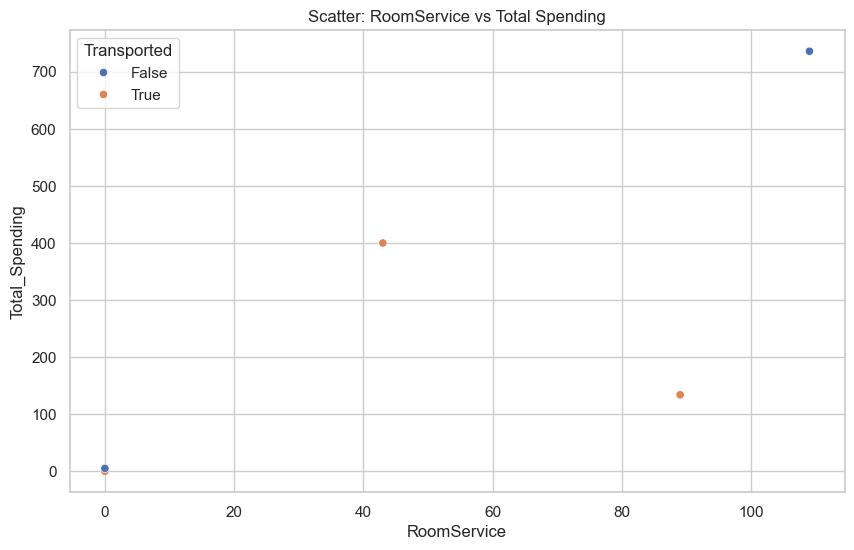

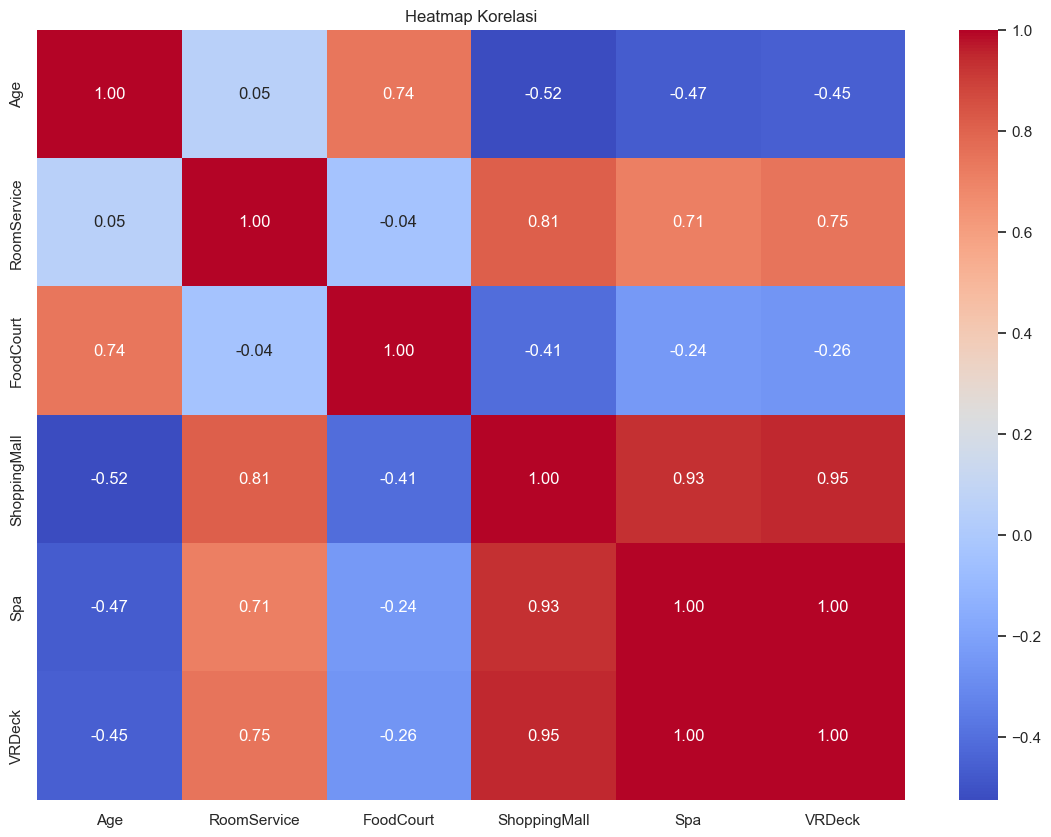

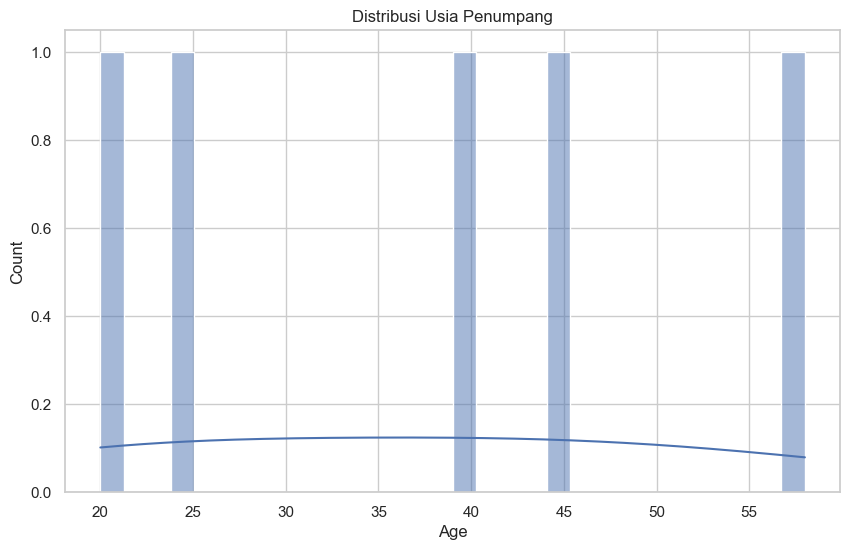

In [11]:
df_viz = train_df.copy()
df_viz['Age'].fillna(df_viz['Age'].median(), inplace=True)
df_viz['Total_Spending'] = df_viz[spending_cols].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='Age', data=df_viz)
plt.title('Boxplot Usia berdasarkan Status Transportasi')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='RoomService', y='Total_Spending', hue='Transported', data=df_viz)
plt.title('Scatter: RoomService vs Total Spending')
plt.show()

plt.figure(figsize=(14, 10))
numeric_df = train_df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_viz['Age'], bins=30, kde=True)
plt.title('Distribusi Usia Penumpang')
plt.show()

Outlier terdeteksi:
 Empty DataFrame
Columns: [nilai]
Index: [] 



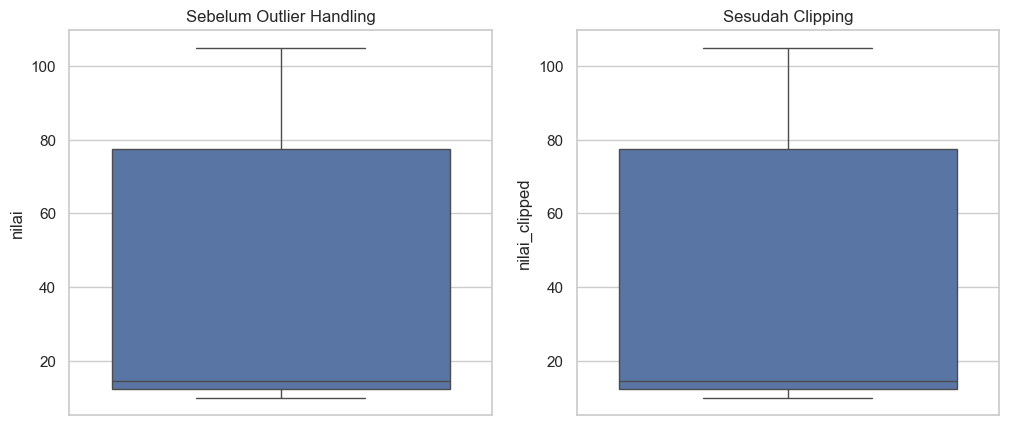

✅ Semua tahap pra-pemrosesan dan analisis selesai!



In [12]:
data_outlier = pd.DataFrame({'nilai': [10, 12, 14, 16, 11, 15, 13, 100, 105, 98]})
Q1 = data_outlier['nilai'].quantile(0.25)
Q3 = data_outlier['nilai'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

outliers = data_outlier[(data_outlier['nilai'] < lower) | (data_outlier['nilai'] > upper)]
print("Outlier terdeteksi:\n", outliers, "\n")

data_outlier['nilai_clipped'] = data_outlier['nilai'].clip(lower, upper)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=data_outlier['nilai'], ax=axes[0]).set_title('Sebelum Outlier Handling')
sns.boxplot(y=data_outlier['nilai_clipped'], ax=axes[1]).set_title('Sesudah Clipping')
plt.show()

print("✅ Semua tahap pra-pemrosesan dan analisis selesai!\n")
